# Використання моделі сумішей Гаусса
## Отримуємо дані

In [57]:
import pandas as pd

from home_works.numerical_programming.util import load_dataset

URL = "https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true"

df = pd.DataFrame()

for year in range(2015, 2020):
    df_year = load_dataset(URL, f"WorldHappinessReport_{year}.csv")
    df_year["year"] = year
    df = pd.concat([df, df_year])

df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


## Отримуємо загальну інформацію про датасет

In [58]:
df.describe(include="all")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,790,790,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
unique,158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,2017.000000
std,NaN,NaN,45.638235,1.142104,0.017103,0.402098,0.271678,0.246451,0.150310,0.119729,0.126363,0.552145,1.415109
min,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,NaN,NaN,40.000000,4.518000,0.037260,0.545580,0.855630,0.438730,0.328180,0.061460,0.149820,1.758730,2016.000000
50%,NaN,NaN,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,2017.000000
75%,NaN,NaN,119.000000,6.269000,0.052320,1.159910,1.216240,0.811600,0.550110,0.180600,0.311050,2.465310,2018.000000


## Виводимо розподіли числових ознак

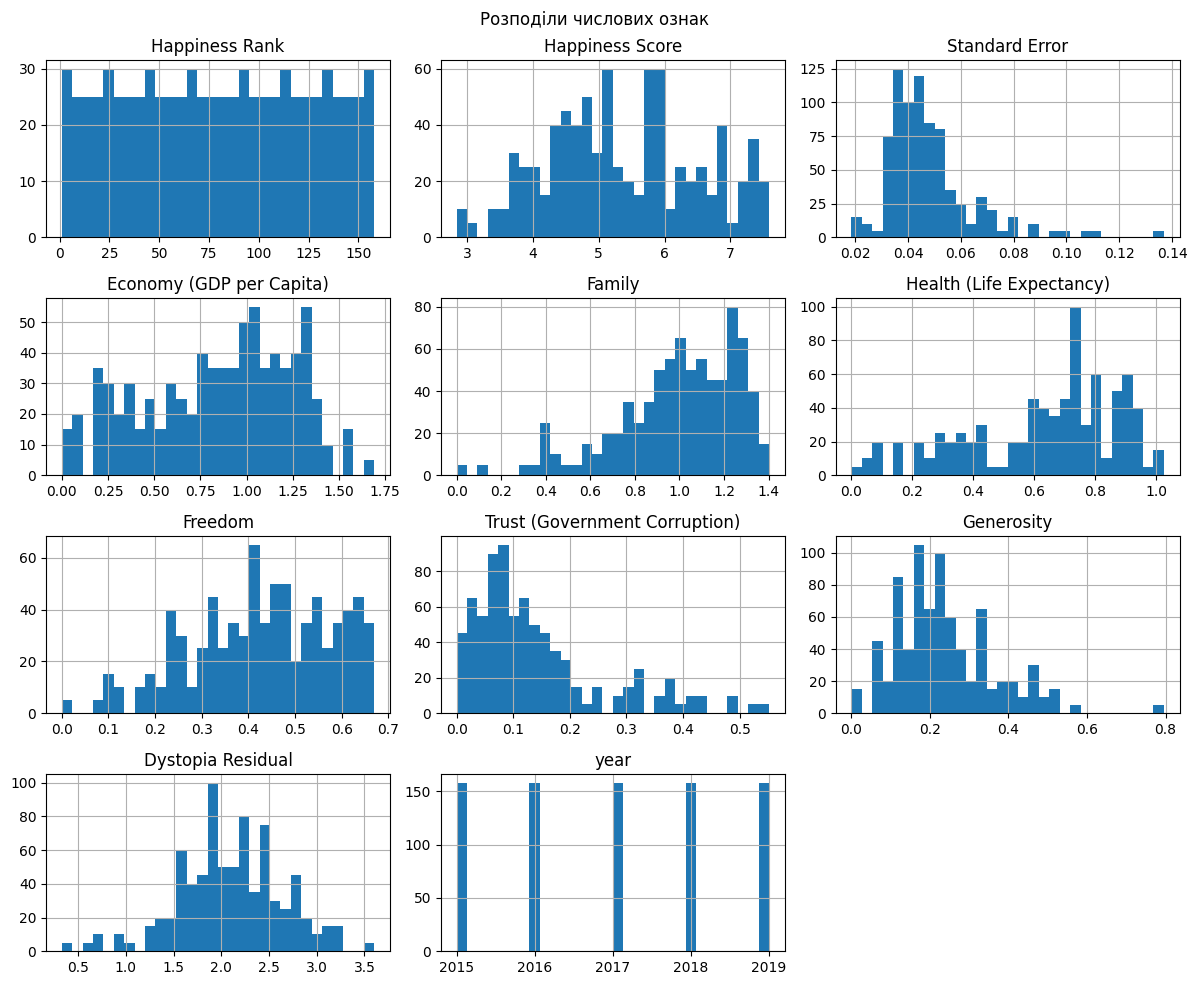

In [59]:
from matplotlib import pyplot as plt

#Гістограми для розподілу ознак
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Розподіли числових ознак")
plt.tight_layout()
plt.show()

Як бачимо, усі значимі ознаки мають якраз нормальний розподіл. Роки - не несуть якраз інформативного навантаження, тому їх розподіл не важливий.

## Виводимо загальну інформацію та втясняємо, чи маємо пусті значення

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        790 non-null    object 
 1   Region                         790 non-null    object 
 2   Happiness Rank                 790 non-null    int64  
 3   Happiness Score                790 non-null    float64
 4   Standard Error                 790 non-null    float64
 5   Economy (GDP per Capita)       790 non-null    float64
 6   Family                         790 non-null    float64
 7   Health (Life Expectancy)       790 non-null    float64
 8   Freedom                        790 non-null    float64
 9   Trust (Government Corruption)  790 non-null    float64
 10  Generosity                     790 non-null    float64
 11  Dystopia Residual              790 non-null    float64
 12  year                           790 non-null    int64  


In [61]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
year                             0
dtype: int64

Пустих значень не спостерігається.

## Енкодуємо категоріальні колонки, стандартизуємо та виведемо таблицю кореляцій

In [62]:
countries = df["Country"].unique()
countries

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [63]:
regions = df["Region"].unique()
regions

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [64]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Припустимо, df вже існує і має колонки "Country" та "Region"
cols = ["Country", "Region"]

# Підготуйте категорії (списки категорій для кожної колонки відповідно)
countries = pd.Index(df["Country"].dropna().unique())
regions = pd.Index(df["Region"].dropna().unique())

encoder = OrdinalEncoder(
    categories=[countries.tolist(), regions.tolist()],
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    dtype=np.int8
)

# Навчання і трансформація тільки на обраних колонках
X_encoded = encoder.fit_transform(df[cols])

# Повертаємо у DataFrame, замінюючи вихідні стовпці
df_encoded = df.copy()
df_encoded[cols] = X_encoded

df_encoded.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,1,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [65]:
corr_matrix = df_encoded.corr().style.background_gradient(cmap='coolwarm')
corr_matrix

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Country,1.000000,-0.095002,-0.293307,0.281539,0.128168,0.216873,0.265695,0.210937,-0.069156,-0.132575,-0.106641,0.271549,0.000000
Region,-0.095002,1.000000,0.682942,-0.691704,0.166879,-0.692340,-0.501211,-0.711973,-0.381365,-0.341903,-0.163055,-0.146971,-0.000000
Happiness Rank,-0.293307,0.682942,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,-0.000000
Happiness Score,0.281539,-0.691704,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,0.000000
Standard Error,0.128168,0.166879,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.000000
Economy (GDP per Capita),0.216873,-0.692340,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.000000
Family,0.265695,-0.501211,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.000000
Health (Life Expectancy),0.210937,-0.711973,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.000000
Freedom,-0.069156,-0.381365,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.000000
Trust (Government Corruption),-0.132575,-0.341903,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.000000


### Що ми бачимо
З таблиці бачимо, що наступні ознаки є найбільш взаємозалежними:

- **Economy (GDP per Capita) <-> Health (Life Expectancy)**
- **Economy (GDP per Capita) <-> Happiness Score**
- **Health (Life Expectancy) <-> Happiness Score**
- **Region <-> Hapiness Rank**
- **Family <-> Hapiness Rank**

## Створимо і виводимо теплову мапу розподілу балу щасливості по країнах

In [71]:
import plotly.express as px

fig = px.choropleth(df,
                    locations = "Country",
                    color = "Happiness Score",
                    locationmode = "country names",
                    )
fig.update_layout(title = "Happiness Index")
fig.show()

## Готуємо та стандартизуємо дані для застосування Гаусівських сумішей

In [72]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Припустимо, df вже існує
# Визначаємо типи ознак
numeric_features = df.select_dtypes(include=["number"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OrdinalEncoder(
    categories=[countries.tolist(), regions.tolist()],
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    dtype=np.int8
))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_trans = preprocessor.fit_transform(df)

# Формуємо імена колонок для DataFrame
cat_feature_names = []
if len(categorical_features) > 0:
    encoder = preprocessor.named_transformers_["cat"].named_steps["encoder"]
    cat_feature_names = encoder.get_feature_names_out(categorical_features).tolist()

num_feature_names = numeric_features
all_columns = num_feature_names + cat_feature_names

df_scaled = pd.DataFrame(X_trans, columns=all_columns, index=df.index)

df_scaled.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,cluster,Country,Region
0,-1.721000,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258,-1.414214,1.150447,0.0,0.0
1,-1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857,-1.414214,1.150447,1.0,0.0
2,-1.677149,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335,-1.414214,1.150447,2.0,0.0
3,-1.655224,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893,-1.414214,1.150447,3.0,0.0
4,-1.633299,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337,-1.414214,1.150447,4.0,1.0


## Виводимо розподіли числових ознак у стандартизованому сеті

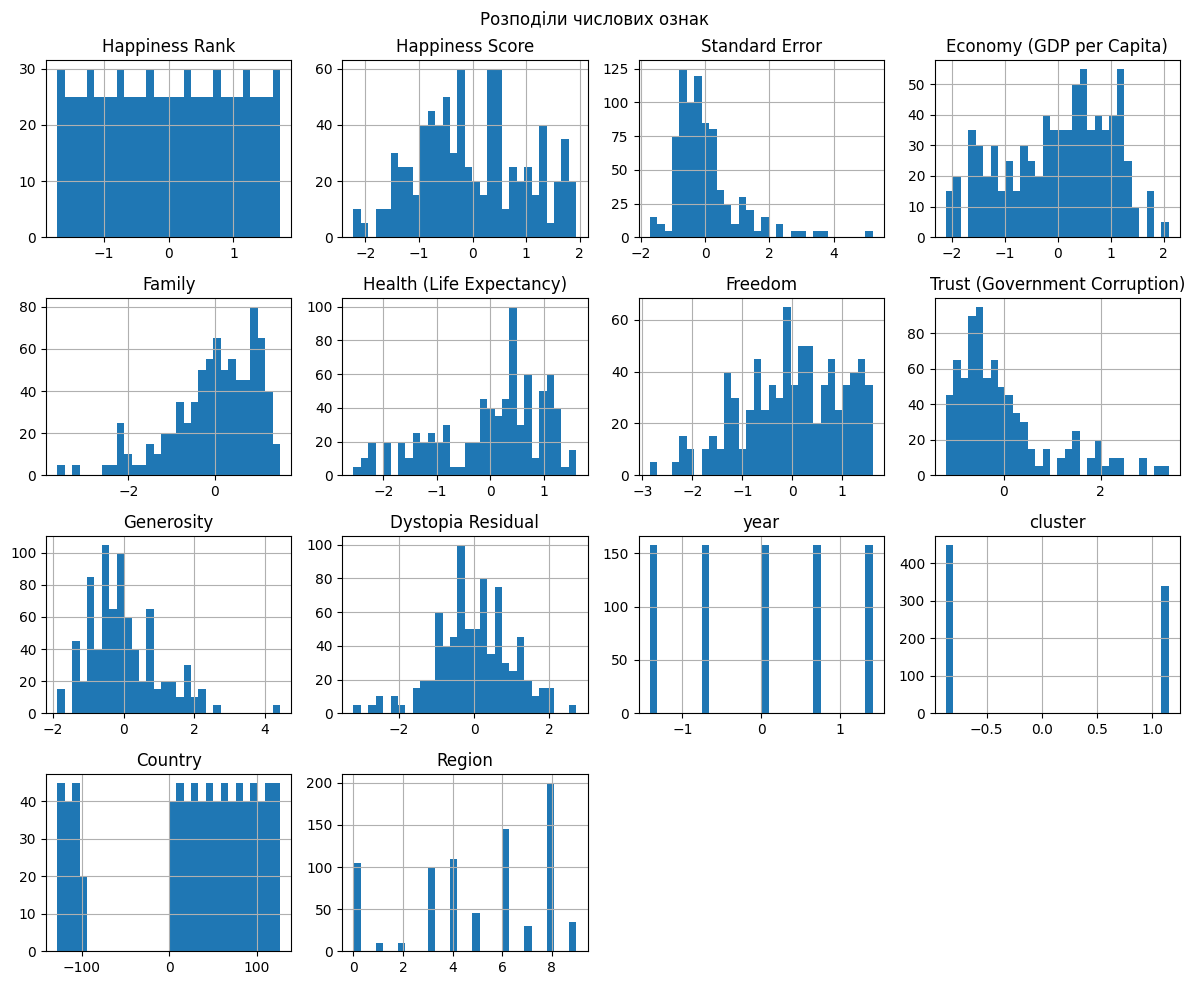

In [73]:
df_scaled.hist(figsize=(12, 10), bins=30)
plt.suptitle("Розподіли числових ознак")
plt.tight_layout()
plt.show()

Як бачимо, дані графіки в основному збігаються з нестандартизованими.

## Розбиваємо на класи, використовуючи метод Гаусових сумішей
В нашому розбитті використаємо 2 кластери. Смислове навантаження кластерів: щасливі і нещасні.

In [74]:
import numpy as np
from sklearn.mixture import GaussianMixture

# 1) Вибираємо лише числові ознаки для моделі
feature_cols = ["Happiness Score"]
# Якщо "Happiness Score" після масштабування точно є у df_scaled:
X = df_scaled[feature_cols].to_numpy(dtype=float)  # форма (n_samples, 1)

# 2) Навчання GMM
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)

# 3) Прогноз кластерів
labels = gmm.predict(X)

# 4) Додаємо мітки до DataFrame (країна лишається як ідентифікатор)
df_scaled["cluster"] = labels

# Якщо все ж потрібно включити "Country" у підготовку даних (не рекомендується для GMM без кодування),
# можна закодувати його чисельно, наприклад, через map:
# country_codes = df_scaled["Country"].astype('category').cat.codes.to_numpy()
# X_with_country = np.column_stack([country_codes.astype(float), X.squeeze()])
# gmm.fit(X_with_country)
# df_scaled["cluster"] = gmm.predict(X_with_country)

df_scaled.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,cluster,Country,Region
0,-1.721000,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258,-1.414214,1,0.0,0.0
1,-1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857,-1.414214,1,1.0,0.0
2,-1.677149,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335,-1.414214,1,2.0,0.0
3,-1.655224,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893,-1.414214,1,3.0,0.0
4,-1.633299,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337,-1.414214,1,4.0,1.0


## Побудуємо теплову мапу розподілу кластерів по країнах

Для цього нам потрібно перенести кластери на нестандартизовані дані, позаяк там країни мають стрічкове представлення, необхідне для правильної побудови теплової мапи.

In [75]:
df["cluster"] = labels

fig = px.choropleth(df,
                    locations = "Country",
                    color = "cluster",
                    locationmode = "country names",
                    )
fig.update_layout(title = "Happiness Index")
fig.show()

Якщо порівняти із тепловою мапою по балам щасливості, то побачимо, що обидві мапи добре накладаються одна на одну. До кластеру нещасності у нас чітко підпадають країни, бал щастя яких менше за 0.5. Саме тому росія падає у кластер щасливих. Адже ж щасливий не значить добрий. Але метод Гаусових сумішей дуже точно поділив дані країн на щасливих і нещасливих.

## Висновки
Як бачимо, в нашому випадку метод Гаусових сумфшей чітко поділив наші дані на кластери "щасливі" і "нещасливі" рівно по позначці балу щастя 0.5. Це показує ефективність цього методу для категоризації даних.